In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
INPUT_DIR = '../../input/m5-forecasting-accuracy'
sales=pd.read_csv(f'{INPUT_DIR}/sales_train_evaluation.csv')
calendar = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
calendar["date"] = pd.to_datetime(calendar["date"])

In [3]:
item_list = sales['item_id'].unique().tolist()
state_list = ['CA','TX','WI']
index_list = []
for state in state_list:
    for item in item_list:
        index_list.append(state+'_'+item)
df = pd.DataFrame(np.zeros([len(index_list), 1941]), columns=['d_'+str(i+1) for i in range(1941)], index = index_list)
for state in state_list:
    for item in item_list:
        df.iloc[df.index==state+'_'+item,0:] = sales[(sales['item_id']==item)&(sales['state_id']==state)].iloc[:,6:].sum().values

In [4]:
df.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
CA_HOBBIES_1_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [5]:
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2011-02-06','2012-02-05','2013-02-03','2014-02-02', '2015-02-01', '2016-02-07']),
  'lower_window': -3,
  'upper_window': 1,
})

playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2011-01-30','2011-02-06',
                        '2012-01-07','2012-01-08','2012-01-14','2012-01-15','2012-01-22','2012-01-29','2012-02-05',
                        '2013-01-05','2013-01-06','2013-01-12','2013-01-13','2013-01-20','2013-01-27','2013-02-03',
                        '2014-01-04','2014-01-05','2014-01-11','2014-01-12','2014-01-19','2014-01-26','2014-02-02',
                        '2015-01-03','2015-01-04','2015-01-10','2015-01-11','2015-01-18','2015-01-25','2015-02-01',
                        '2016-01-09','2016-01-10','2016-01-16','2016-01-17', '2016-01-24',  '2016-01-31', '2016-02-07'
                       ]),
  'lower_window': -1,
  'upper_window': 1,
})

NBA_days= []
for i,t in zip(calendar[calendar['event_name_1']=='NBAFinalsStart'].index.tolist(),calendar[calendar['event_name_1']=='NBAFinalsEnd'].index.tolist()):
    NBA_days.extend(pd.DatetimeIndex(calendar['date'].iloc[i:(t+1)]).tolist())
NBA_days = pd.DatetimeIndex(NBA_days)

NBA = pd.DataFrame({
  'holiday': 'NBA',
  'ds': NBA_days,
  'lower_window': 0,
  'upper_window': 0,
})

Ramadan_days= []
Ramadan_end =['2011-08-29','2012-08-18','2013-08-07','2014-07-27','2015-07-16','2016-06-19']
for i,t in zip(calendar[calendar['event_name_1']=='Ramadan starts'].index.tolist(),calendar[calendar['date'].isin(Ramadan_end)].index.tolist()):
    Ramadan_days.extend(pd.DatetimeIndex(calendar['date'].iloc[i:(t+1)]).tolist())
Ramadan_days = pd.DatetimeIndex(Ramadan_days)

Ramadan = pd.DataFrame({
  'holiday': 'Ramadan',
  'ds': Ramadan_days,
  'lower_window': 0,
  'upper_window': 0,
})

Eid_ul_Fitr_day = pd.DataFrame({
  'holiday': 'Eid_ul_Fitr_day',
  'ds': pd.to_datetime(['2011-08-30','2012-08-19','2013-08-08','2014-07-28','2015-07-17','2016-06-20']),
  'lower_window': -1,
  'upper_window': 2,
})

black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': pd.to_datetime(['2011-11-25','2012-11-23','2013-11-29','2014-11-28', '2015-11-27']),
  'lower_window': -1,
  'upper_window': 1,
})

CA_snap = pd.DataFrame({
  'holiday': 'ca_snap',
  'ds': pd.DatetimeIndex(calendar[calendar['snap_CA']==1]['date'].values),
  'lower_window': -1,
  'upper_window': 1,
})

holidays = superbowls
holi_col = ['holiday', 'ds', 'lower_window', 'upper_window']
for item in [playoffs,NBA,Ramadan,Eid_ul_Fitr_day,black_friday,CA_snap]:
    holidays = pd.concat([holidays.loc[:,holi_col],item.loc[:,holi_col]])

In [6]:
sample_df = pd.concat([calendar.loc[:1940,['date']], pd.DataFrame(df.T['CA_HOBBIES_1_112'].reset_index(drop=True))],axis=1)
sample_df = sample_df.rename({"date": "ds", "CA_HOBBIES_1_112": "y"}, axis=1)

In [7]:
sample_df

,ds,y
0,2011-01-29,0.0
1,2011-01-30,1.0
2,2011-01-31,0.0
3,2011-02-01,1.0
4,2011-02-02,2.0
...,...,...
1936,2016-05-18,1.0
1937,2016-05-19,1.0
1938,2016-05-20,1.0
1939,2016-05-21,2.0


In [8]:
def cut_outrange(in_df):
    out_df = in_df.copy()
    p0 =  out_df['y'].min()
    p95 = out_df['y'].quantile(0.95)
    out_df['y'] = out_df['y'].clip(p0,p95)
    return out_df

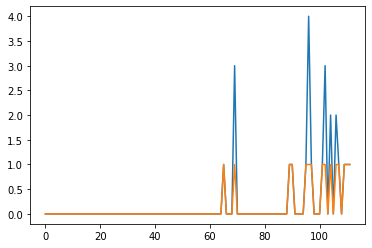

In [9]:
TRAIN_DAYS = 28*4
train = sample_df.iloc[-1*(TRAIN_DAYS+28):-28]
aa=cut_outrange(train)
plt.plot(train['y'].values)
plt.plot(aa['y'].values)
plt.show()

In [10]:
TRAIN_DAYS = 28*4
GROWTH = 1.01

model=Prophet(growth='logistic', holidays=holidays, seasonality_mode='multiplicative', weekly_seasonality=True,yearly_seasonality=True,daily_seasonality=True)
model.add_country_holidays(country_name='US')
train = cut_outrange(sample_df.iloc[-1*(TRAIN_DAYS+28):-28])
train['cap'] = train['y'].max()*GROWTH
model.fit(train)

future_df = model.make_future_dataframe(28)
future_df['cap'] = train['y'].max()*GROWTH
forecast_df = model.predict(future_df)

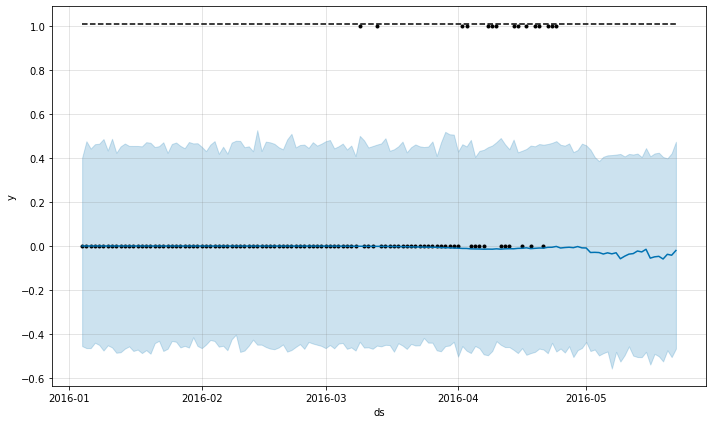

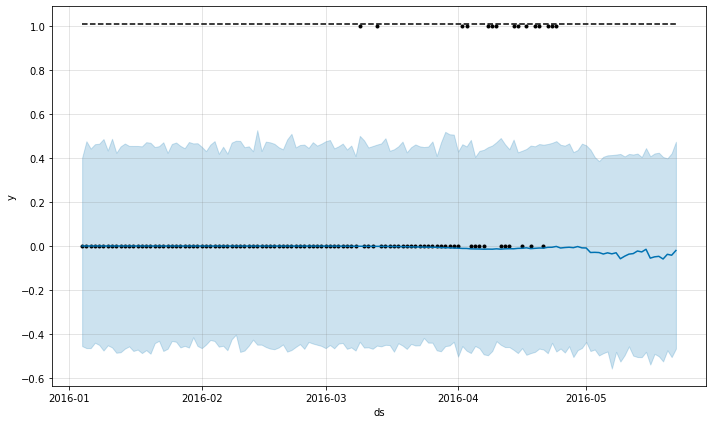

In [11]:
model.plot(forecast_df)

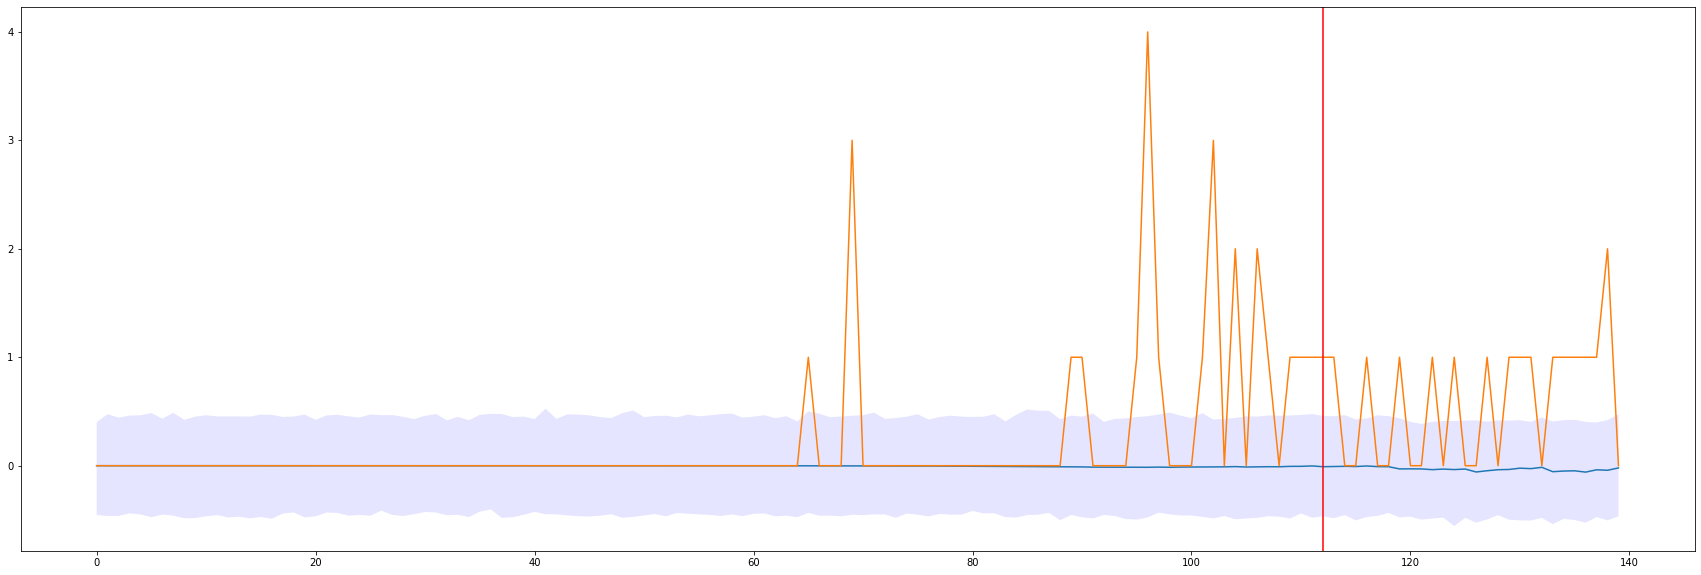

In [12]:
plt.figure(figsize=(30, 10))
plt.plot(forecast_df['yhat'][-1*(TRAIN_DAYS+28):].values)
plt.fill_between(np.arange(TRAIN_DAYS+28),forecast_df['yhat_upper'][-1*(TRAIN_DAYS+28):].values,forecast_df['yhat_lower'][-1*(TRAIN_DAYS+28):].values,facecolor='b',alpha=0.1)
plt.plot(sample_df['y'].iloc[-1*(TRAIN_DAYS+28):].values)
plt.axvline(x=TRAIN_DAYS, ymin=0, ymax=10,color='red')
plt.show()

In [17]:
def predict_prophet(df_name):
    sample_df = pd.concat([calendar.loc[:1940,['date']], pd.DataFrame(df.T[df_name].reset_index(drop=True))],axis=1)
    sample_df = sample_df.rename({"date": "ds", df_name: "y"}, axis=1)
    TRAIN_DAYS = 365*2
    GROWTH = 1.01

    model=Prophet(growth='logistic', holidays=holidays, seasonality_mode='multiplicative', weekly_seasonality=True,yearly_seasonality=True,daily_seasonality=False)
    model.add_country_holidays(country_name='US') 
    train = cut_outrange(sample_df.iloc[-1*(TRAIN_DAYS+28):-28])
    train['cap'] = train['y'].max()*GROWTH+ 0.00000001

    model.fit(train)

    future_df = model.make_future_dataframe(28)
    future_df['cap'] = train['y'].max()*GROWTH + 0.00000001
    forecast_df = model.predict(future_df)
    
    model.plot(forecast_df)
    
    plt.figure(figsize=(30, 10))
    plt.plot(forecast_df['yhat'][-1*(TRAIN_DAYS+28):].values)
    plt.fill_between(np.arange(TRAIN_DAYS+28),forecast_df['yhat_upper'][-1*(TRAIN_DAYS+28):].values,forecast_df['yhat_lower'][-1*(TRAIN_DAYS+28):].values,facecolor='b',alpha=0.1)
    plt.plot(sample_df['y'].iloc[-1*(TRAIN_DAYS+28):].values)
    plt.axvline(x=TRAIN_DAYS, ymin=0, ymax=10,color='red')
    plt.show()
    
    plt.figure(figsize=(30, 10))
    plt.plot(forecast_df['yhat'][-56:].values)
    plt.fill_between(np.arange(56),forecast_df['yhat_upper'][-56:].values,forecast_df['yhat_lower'][-56:].values,facecolor='b',alpha=0.1)
    plt.plot(sample_df['y'].iloc[-56:].values)
    plt.axvline(x=28, ymin=0, ymax=10,color='red')
    plt.show()

In [25]:
def predict_prophet(df_name):
    sample_df = pd.concat([calendar.loc[:1940,['date']], pd.DataFrame(df.T[df_name].reset_index(drop=True))],axis=1)
    sample_df = sample_df.rename({"date": "ds", df_name: "y"}, axis=1)
    TRAIN_DAYS = 365*2
    GROWTH = 1.01

    model=Prophet(growth='logistic', holidays=holidays, seasonality_mode='multiplicative', weekly_seasonality=True,yearly_seasonality=True,daily_seasonality=False)
    model.add_country_holidays(country_name='US') 
    train = cut_outrange(sample_df.iloc[-1*(TRAIN_DAYS+28):-28])
    train['cap'] = train['y'].max()*GROWTH

    if   train['y'].max().max() != 0:
        model.fit(train)

        future_df = model.make_future_dataframe(28)
        future_df['cap'] = train['y'].max()*GROWTH + 0.00000001
        forecast_df = model.predict(future_df)
        
        model.plot(forecast_df)
        
        plt.figure(figsize=(30, 10))
        plt.plot(forecast_df['yhat'][-1*(TRAIN_DAYS+28):].values)
        plt.fill_between(np.arange(TRAIN_DAYS+28),forecast_df['yhat_upper'][-1*(TRAIN_DAYS+28):].values,forecast_df['yhat_lower'][-1*(TRAIN_DAYS+28):].values,facecolor='b',alpha=0.1)
        plt.plot(sample_df['y'].iloc[-1*(TRAIN_DAYS+28):].values)
        plt.axvline(x=TRAIN_DAYS, ymin=0, ymax=10,color='red')
        plt.show()
        
        plt.figure(figsize=(30, 10))
        plt.plot(forecast_df['yhat'][-56:].values)
        plt.fill_between(np.arange(56),forecast_df['yhat_upper'][-56:].values,forecast_df['yhat_lower'][-56:].values,facecolor='b',alpha=0.1)
        plt.plot(sample_df['y'].iloc[-56:].values)
        plt.axvline(x=28, ymin=0, ymax=10,color='red')
        plt.show()
    else:
        print('='*100)
        forecast_df = model.predict(future_df)
        plt.figure(figsize=(30, 10))
        plt.plot(sample_df['y'].iloc[-1*(TRAIN_DAYS+28):].values)
        plt.axvline(x=TRAIN_DAYS, ymin=0, ymax=10,color='red')
        plt.show()

In [27]:
def predict_prophet(df_name):
    sample_df = pd.concat([calendar.loc[:1940,['date']], pd.DataFrame(df.T[df_name].reset_index(drop=True))],axis=1)
    sample_df = sample_df.rename({"date": "ds", df_name: "y"}, axis=1)
    TRAIN_DAYS = 365*2
    GROWTH = 1.01

    model=Prophet(holidays=holidays, seasonality_mode='multiplicative', weekly_seasonality=True,yearly_seasonality=True,daily_seasonality=False)
    model.add_country_holidays(country_name='US') 
    train = cut_outrange(sample_df.iloc[-1*(TRAIN_DAYS+28):-28])
    # train['cap'] = train['y'].max()*GROWTH

    model.fit(train)

    future_df = model.make_future_dataframe(28)
    # future_df['cap'] = train['y'].max()*GROWTH + 0.00000001
    forecast_df = model.predict(future_df)
    
    model.plot(forecast_df)
    
    plt.figure(figsize=(30, 10))
    plt.plot(forecast_df['yhat'][-1*(TRAIN_DAYS+28):].values)
    plt.fill_between(np.arange(TRAIN_DAYS+28),forecast_df['yhat_upper'][-1*(TRAIN_DAYS+28):].values,forecast_df['yhat_lower'][-1*(TRAIN_DAYS+28):].values,facecolor='b',alpha=0.1)
    plt.plot(sample_df['y'].iloc[-1*(TRAIN_DAYS+28):].values)
    plt.axvline(x=TRAIN_DAYS, ymin=0, ymax=10,color='red')
    plt.show()
    
    plt.figure(figsize=(30, 10))
    plt.plot(forecast_df['yhat'][-56:].values)
    plt.fill_between(np.arange(56),forecast_df['yhat_upper'][-56:].values,forecast_df['yhat_lower'][-56:].values,facecolor='b',alpha=0.1)
    plt.plot(sample_df['y'].iloc[-56:].values)
    plt.axvline(x=28, ymin=0, ymax=10,color='red')
    plt.show()

In [15]:
df.head()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,...,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
CA_HOBBIES_1_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

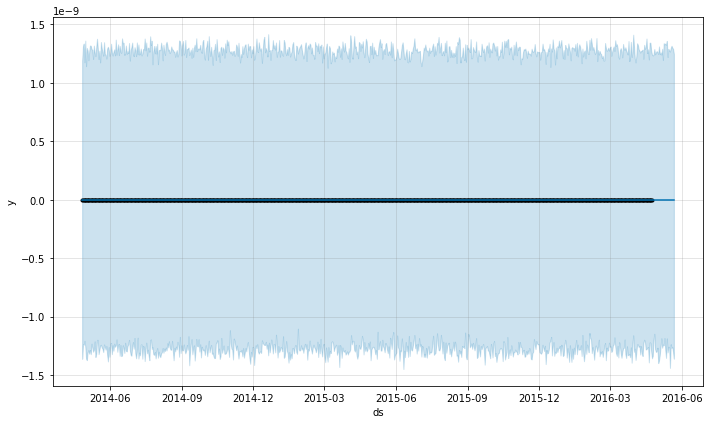

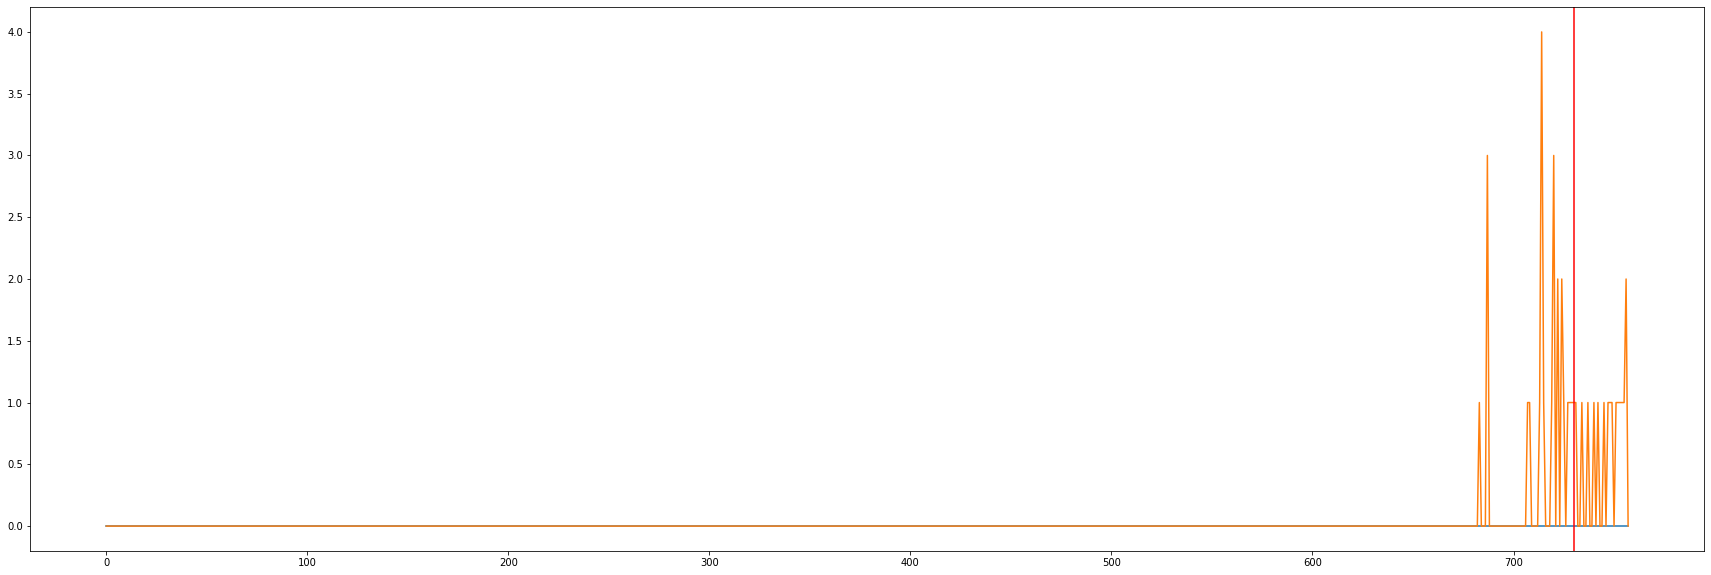

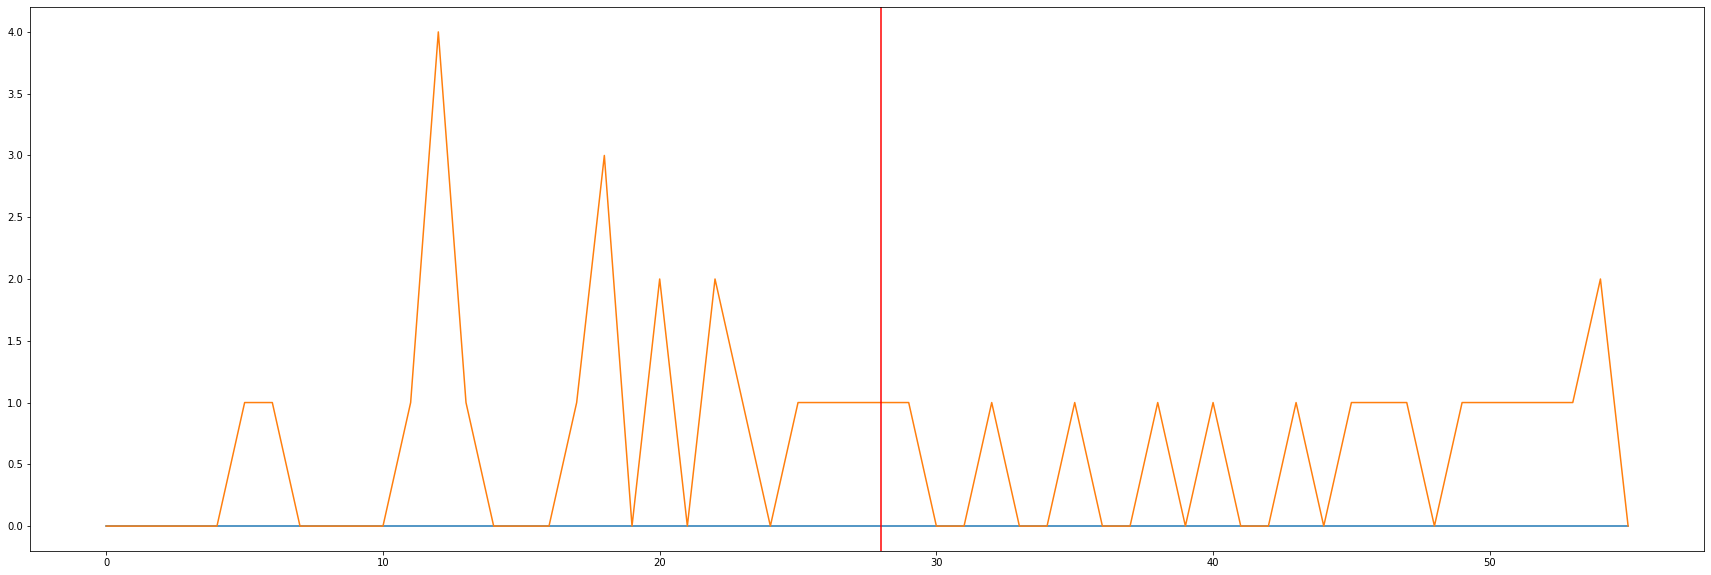

In [28]:
predict_prophet('CA_HOBBIES_1_112')

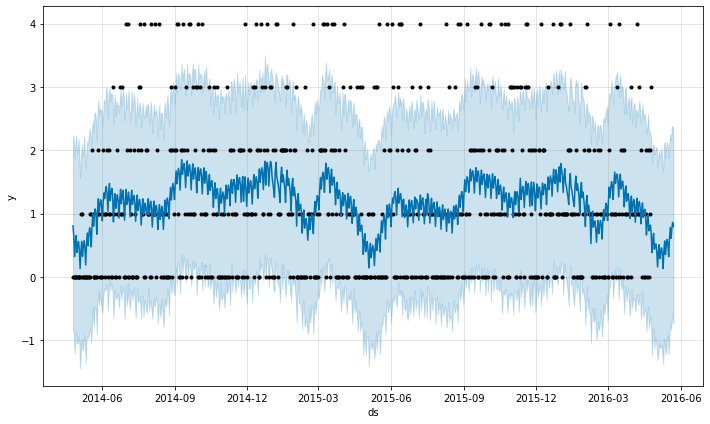

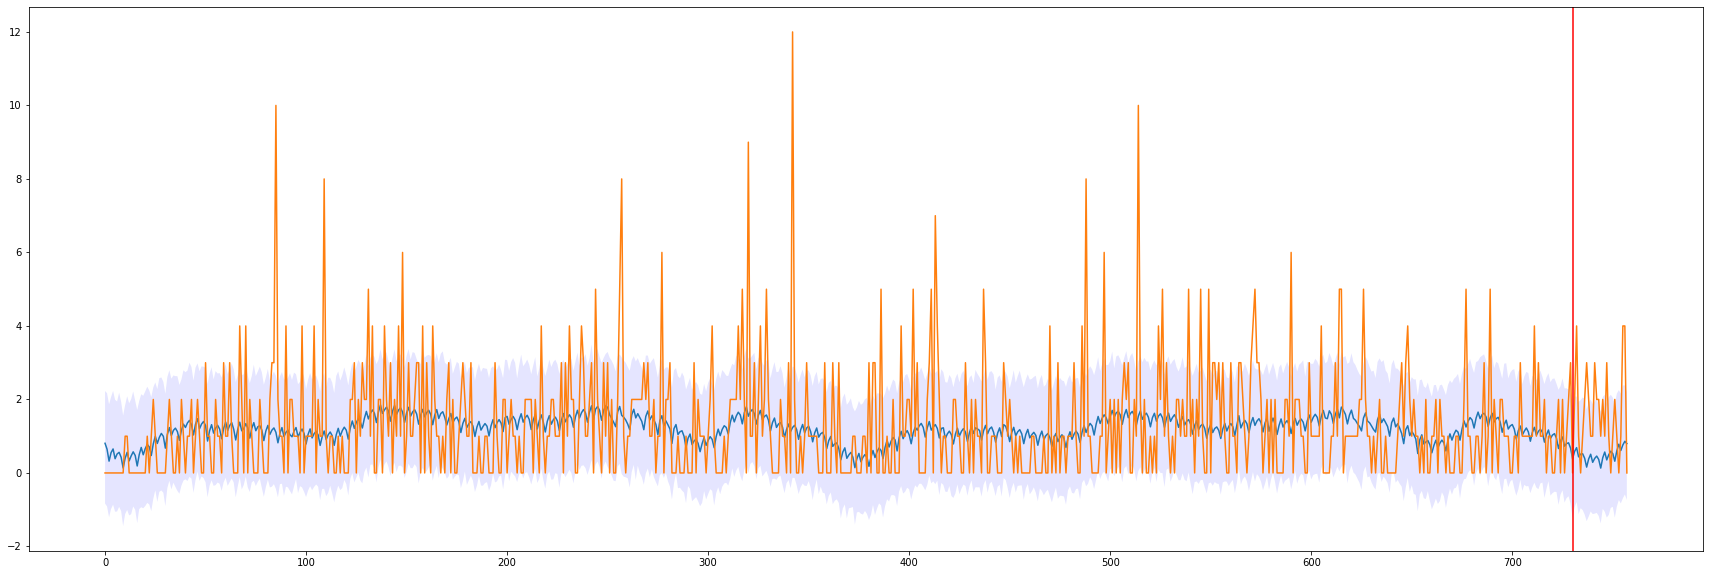

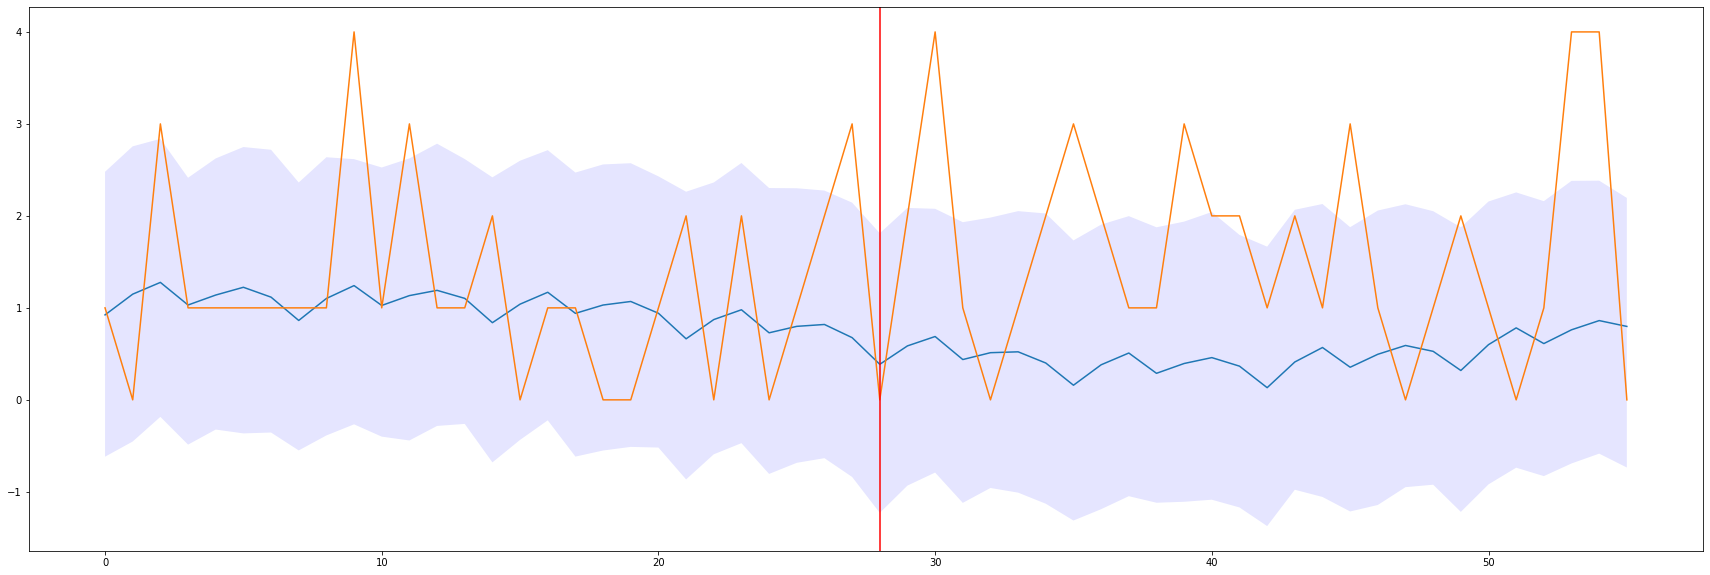

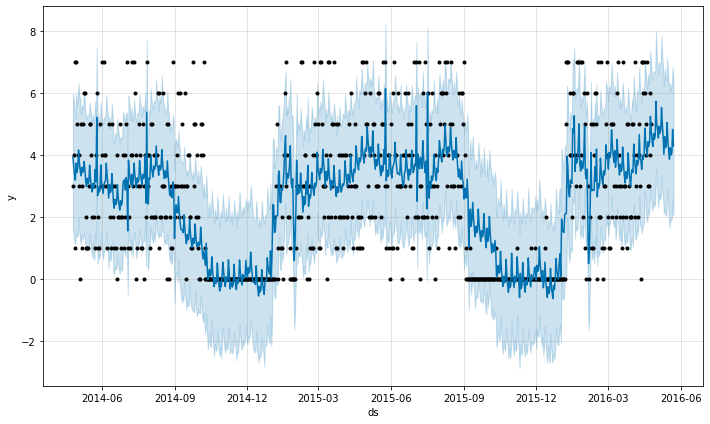

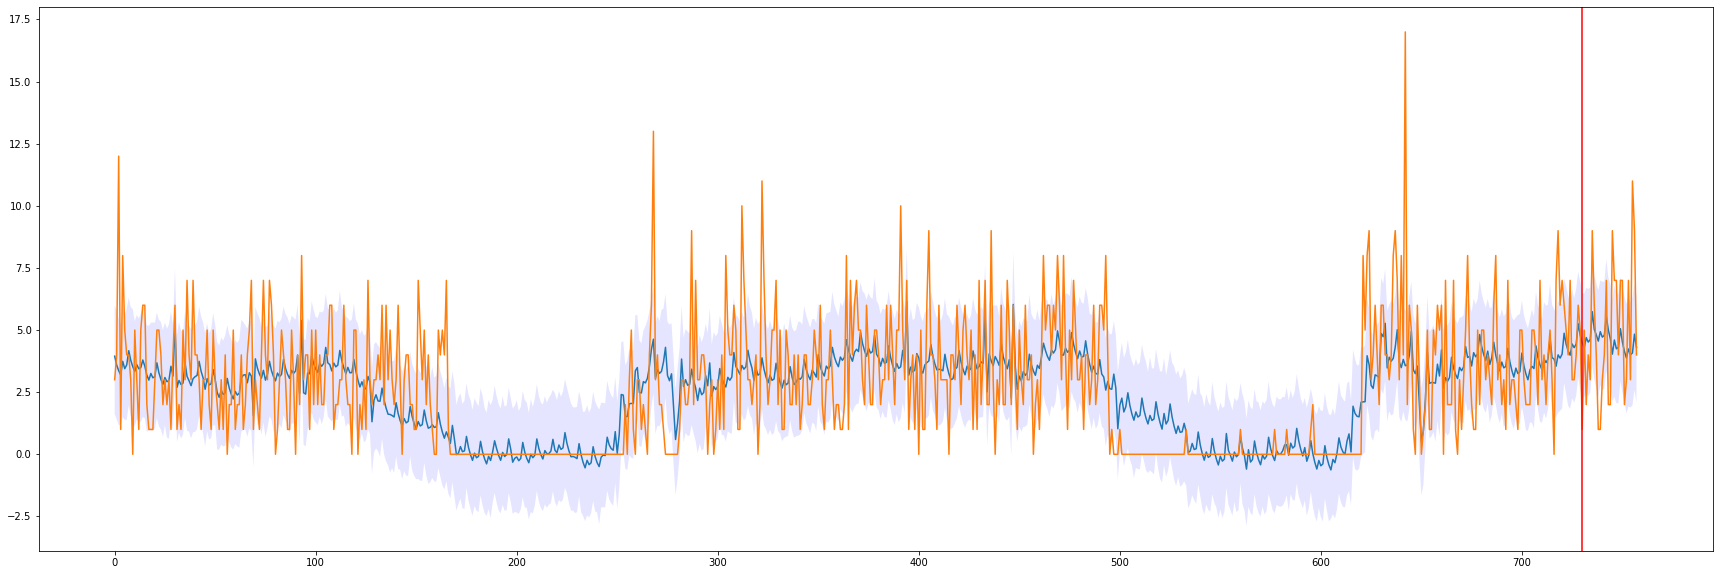

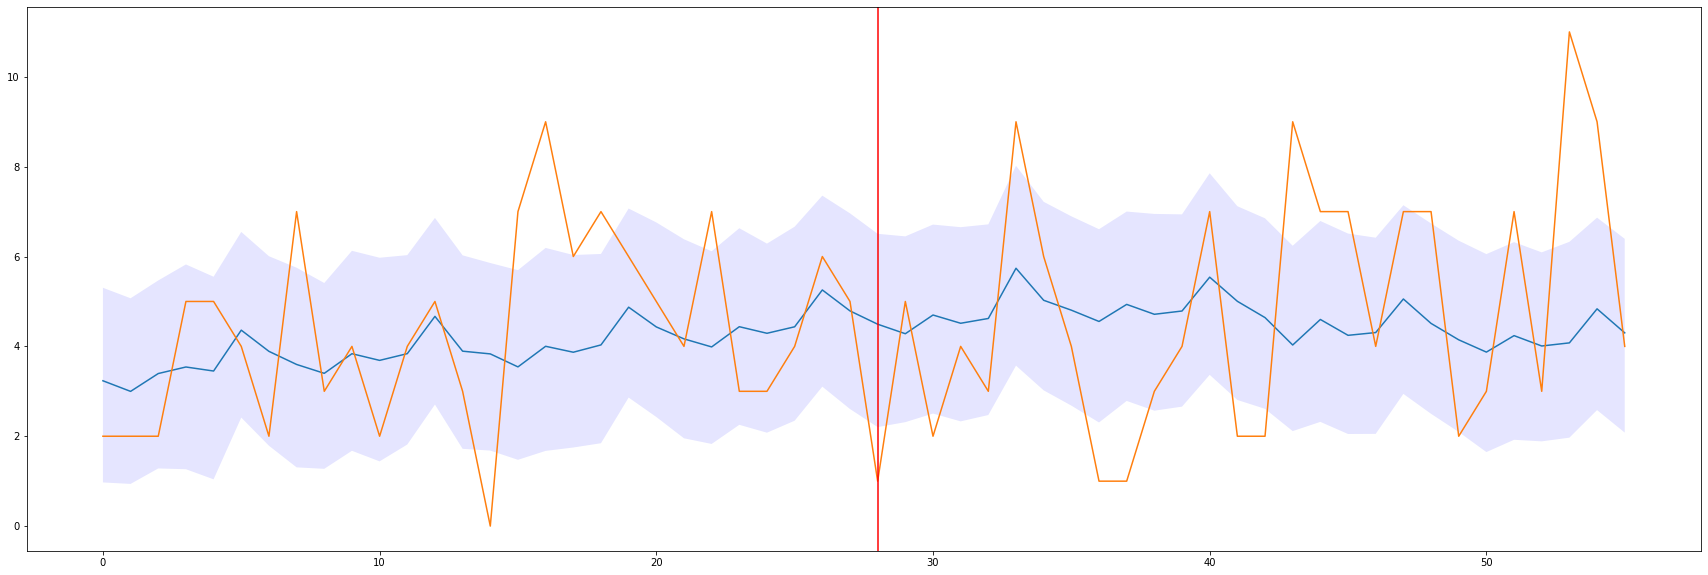

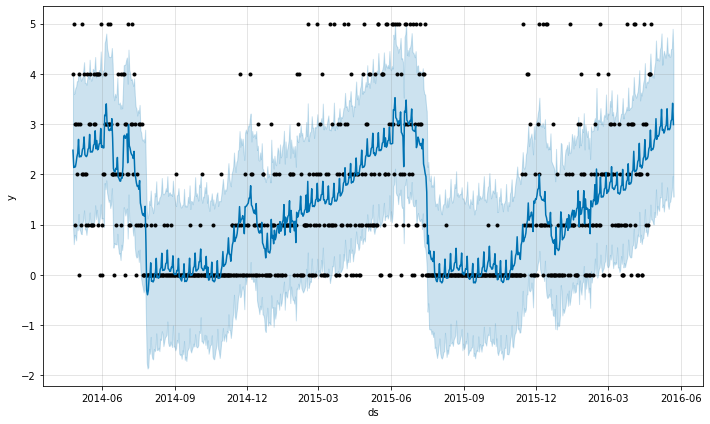

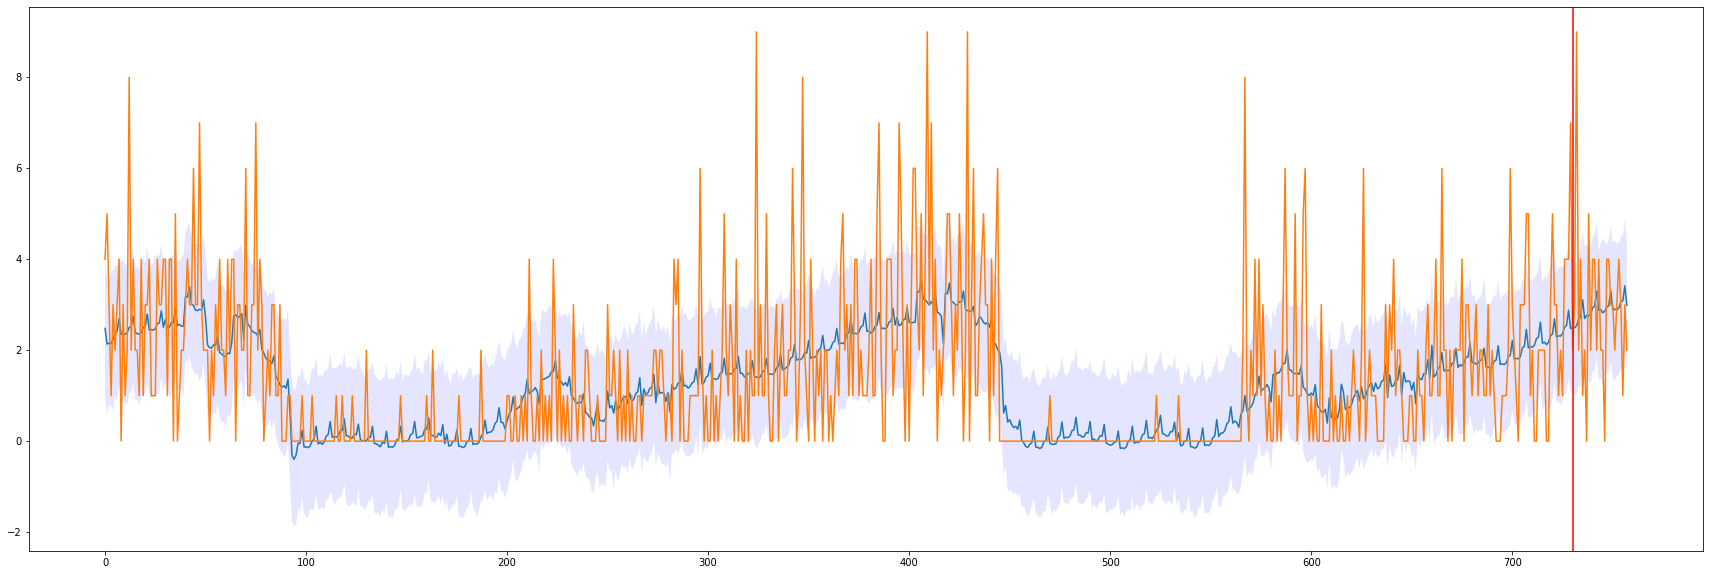

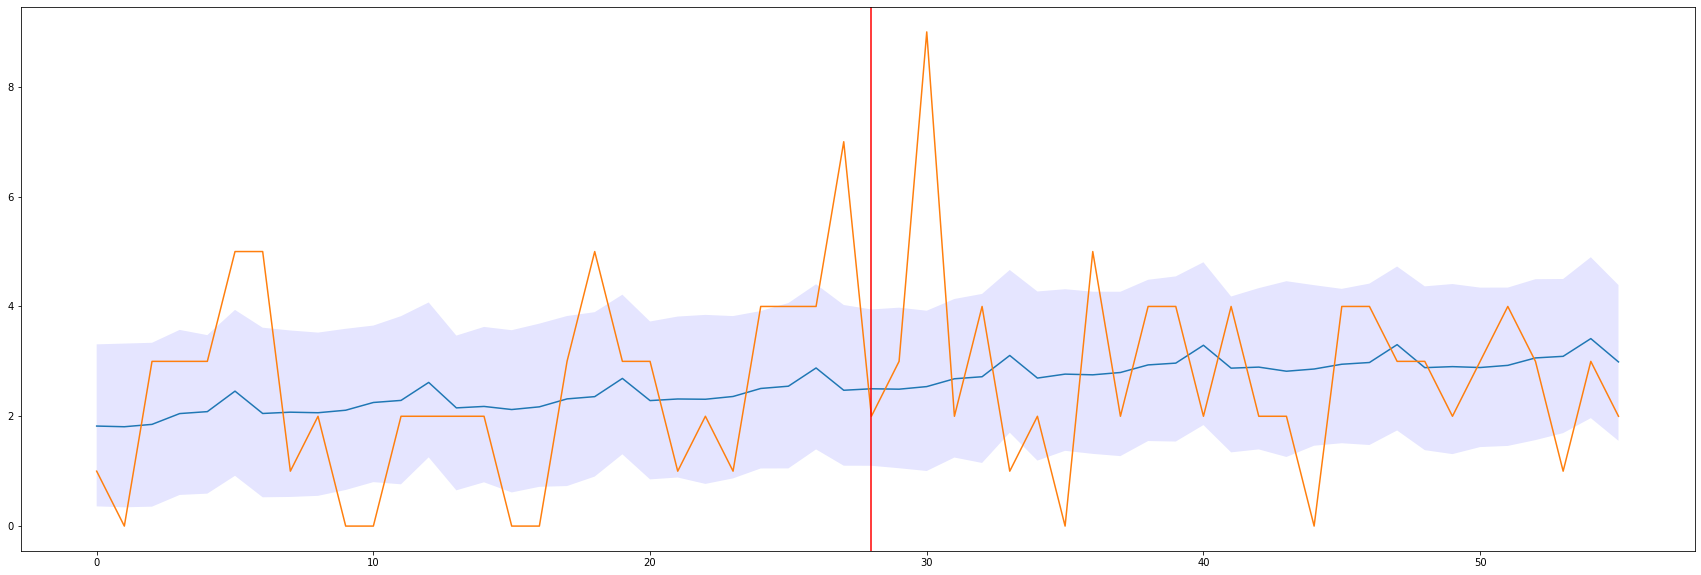

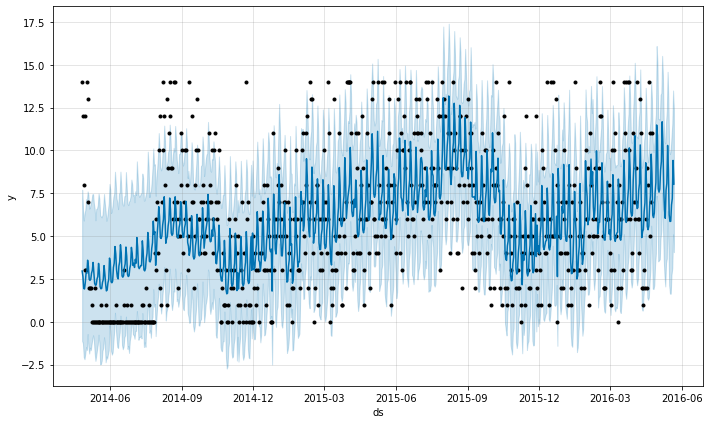

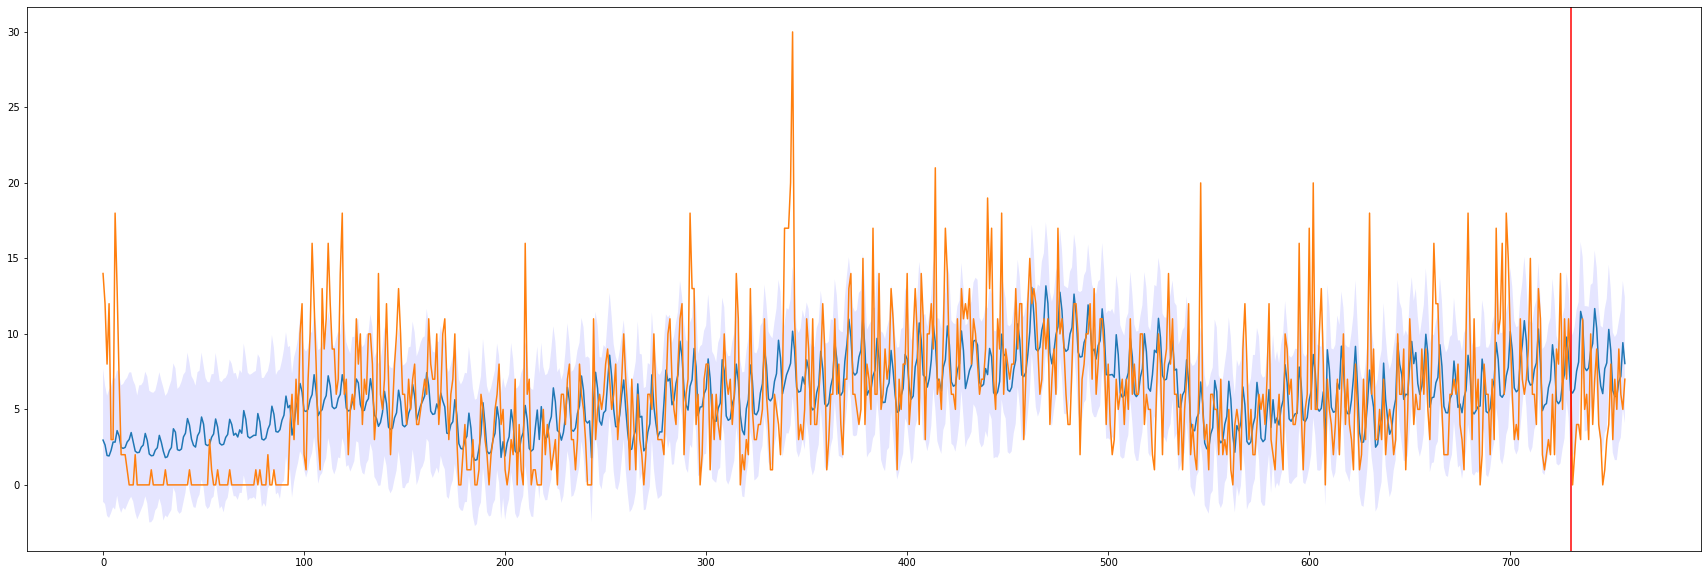

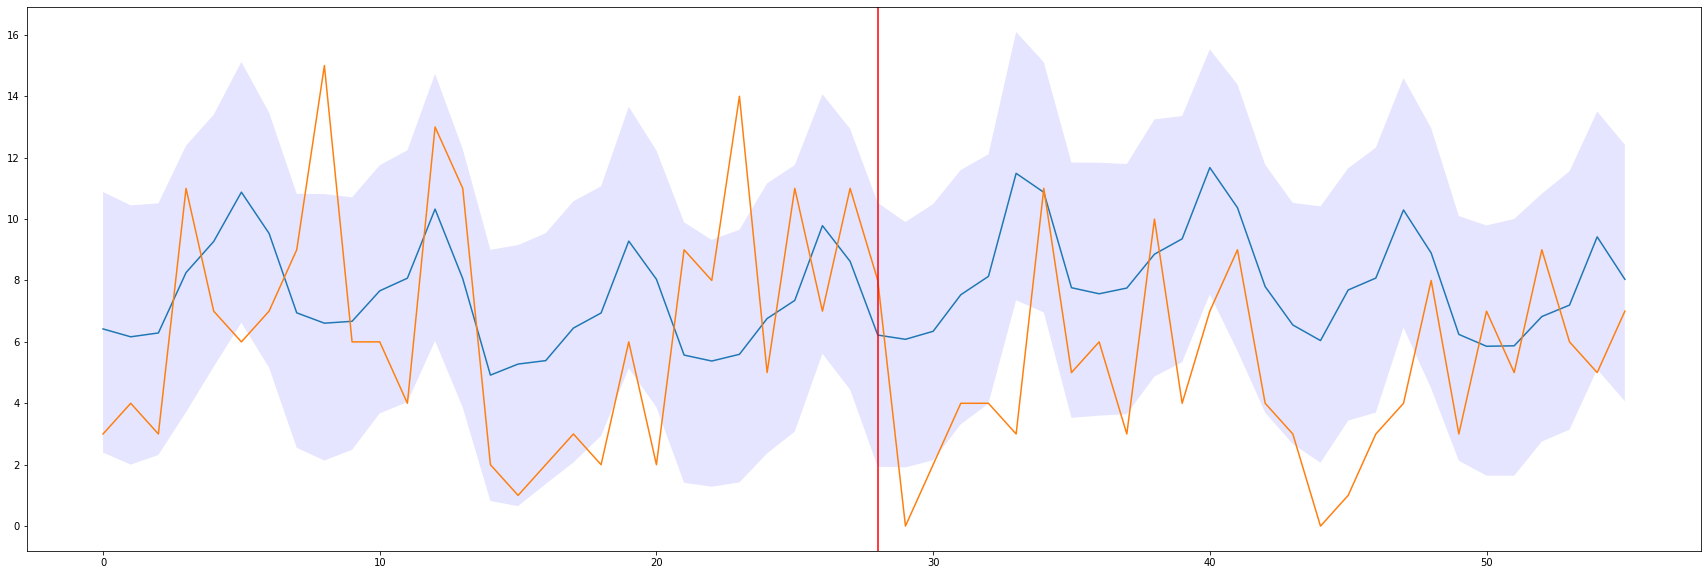

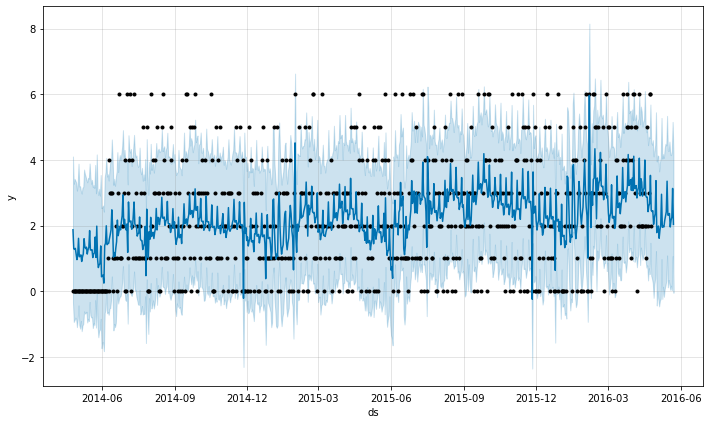

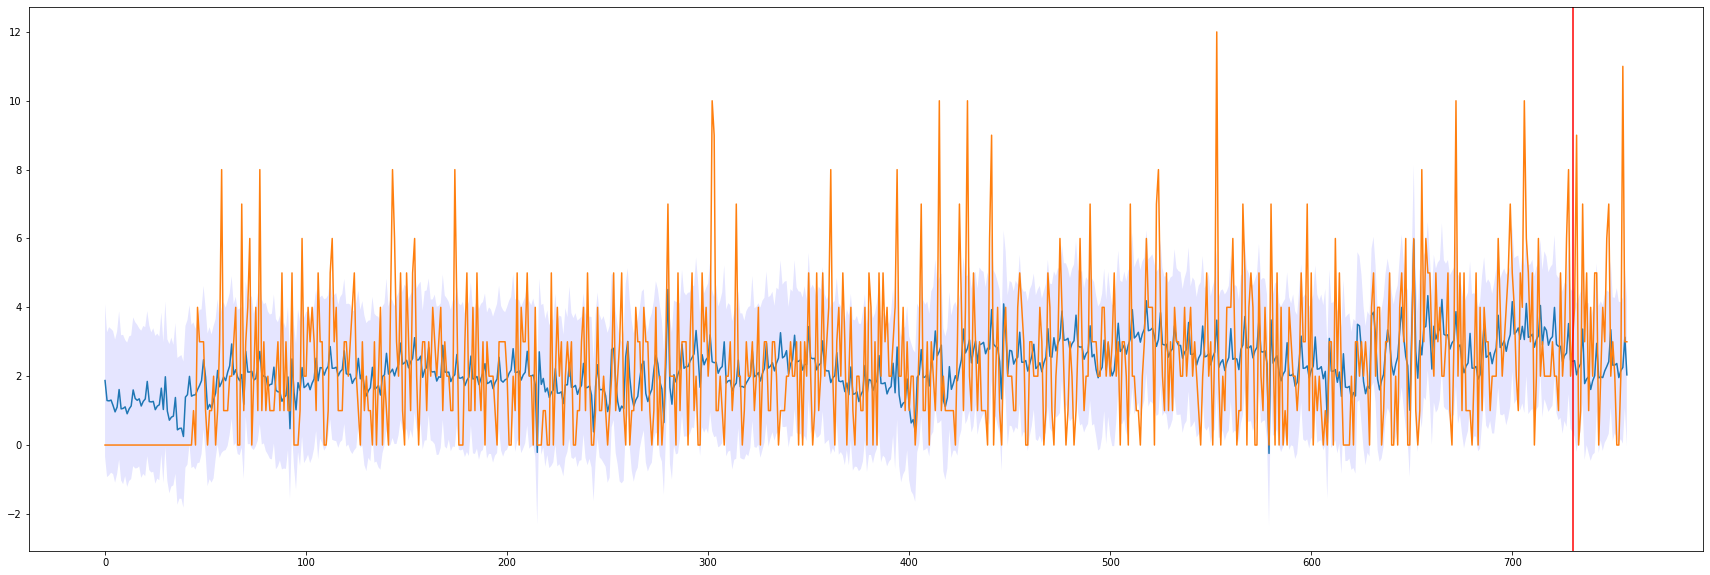

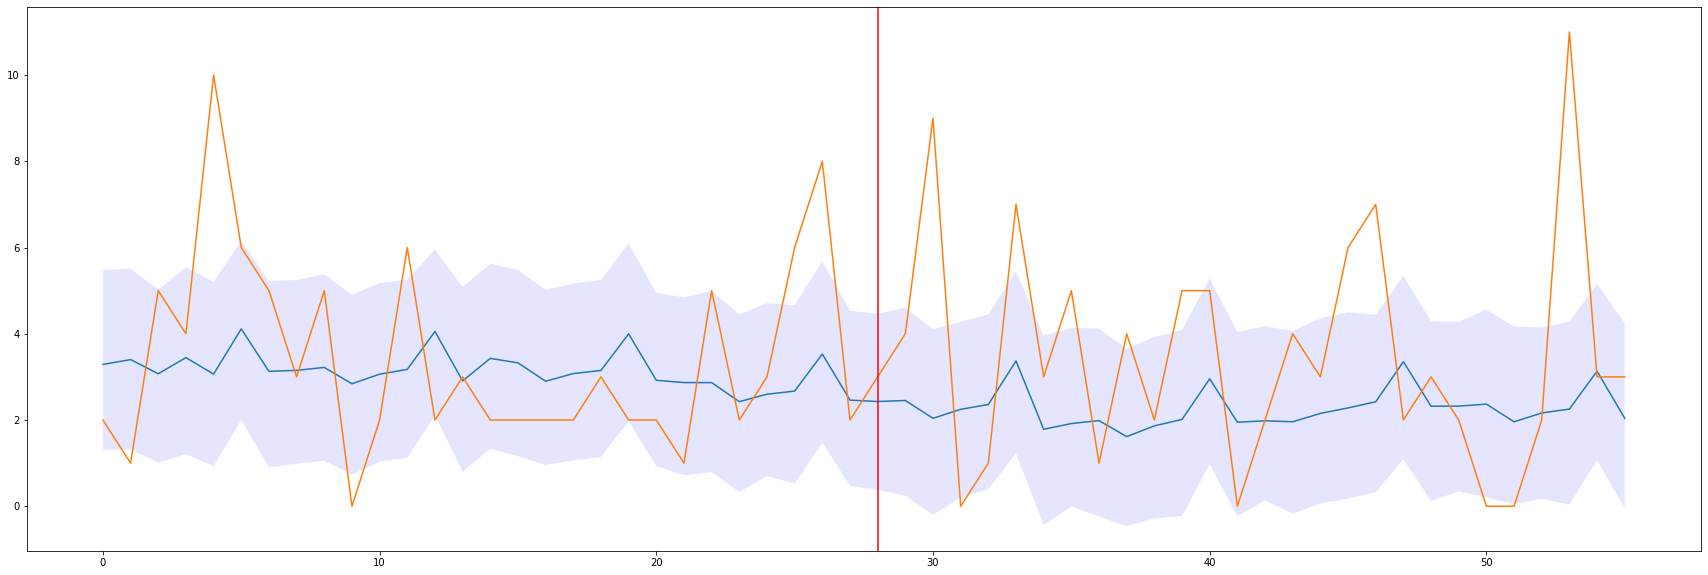

In [29]:
for i in range(5):
    predict_prophet(f'CA_FOODS_1_0{(i+1)*10}')

In [98]:
calendar.tail(50)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1919,2016-05-01,11614,Sunday,2,5,2016,d_1920,OrthodoxEaster,Religious,NaN,NaN,1,1,0
1920,2016-05-02,11614,Monday,3,5,2016,d_1921,NaN,NaN,NaN,NaN,1,0,1
1921,2016-05-03,11614,Tuesday,4,5,2016,d_1922,NaN,NaN,NaN,NaN,1,1,1
1922,2016-05-04,11614,Wednesday,5,5,2016,d_1923,NaN,NaN,NaN,NaN,1,0,0
1923,2016-05-05,11614,Thursday,6,5,2016,d_1924,Cinco De Mayo,Cultural,NaN,NaN,1,1,1
1924,2016-05-06,11614,Friday,7,5,2016,d_1925,NaN,NaN,NaN,NaN,1,1,1
1925,2016-05-07,11615,Saturday,1,5,2016,d_1926,NaN,NaN,NaN,NaN,1,1,0
1926,2016-05-08,11615,Sunday,2,5,2016,d_1927,Mother's day,Cultural,NaN,NaN,1,0,1
1927,2016-05-09,11615,Monday,3,5,2016,d_1928,NaN,NaN,NaN,NaN,1,1,1
1928,2016-05-10,11615,Tuesday,4,5,2016,d_1929,NaN,NaN,NaN,NaN,1,0,0
